In [4]:
# importing numpy library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b

In [6]:
salary_data = pd.read_csv(r'C:\Users\User\3D Objects\Salary_Data.csv' )

In [7]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
salary_data.shape

(30, 2)

In [9]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [11]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [12]:
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)


In [14]:
model = Linear_Regression(learning_rate=0.01,no_of_iterations=1000)

In [15]:
model.fit(X_train,Y_train)

In [16]:
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9613.82807150452
bias =  23173.61056081348


In [17]:
test_data_prediction = model.predict(X_test)

In [18]:
print(test_data_prediction)

[ 35671.58705377  33748.82143947  66435.83688258  58744.77442538
  91431.7898685   80856.57898984 102007.00074715  52015.09477533
  42401.26670382]


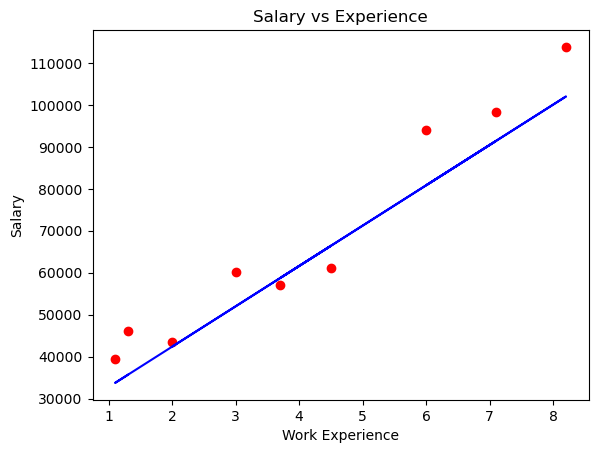

In [19]:
plt.scatter( X_test, Y_test, color = 'red' )
plt.plot( X_test, test_data_prediction, color = 'blue' )    
plt.xlabel( 'Work Experience' )
plt.ylabel( 'Salary' )
plt.title( 'Salary vs Experience' )
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,test_data_prediction)

66421941.35992523